# **Data Wrangling**
*Objetivo: Aprender manipulación y transformación de datos*

*Dataset del Ejercicio: http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf*


> **Objetos Comunes en Datos**

DataFrame

Serie



> **Lectura de archivos de datos**


Pandas soporta la lectura de una amplia cantidad de formatos ([más info](http://pandas.pydata.org/pandas-docs/stable/io.html)):

- read_csv
- read_excel
- read_hdf
- read_sql
- read_json
- read_msgpack (experimental)
- read_html
- read_gbq (experimental)
- read_stata
- read_sas
- read_clipboard
- read_pickle

---
#### **Importar/Crear Datasets**
---

In [1]:
# Importamos librerías

import pandas as pd
import numpy as np

**Usando listas**

In [2]:
# Crear listas de datos
nombres = ['Juan', 'María', 'Pedro', 'Ana', 'Luisa']
edades = [25, 30, 35, 40, 45]
interes = ['Economía', 'Marketing', 'Medicina', 'Medicina', 'Diseño']

# Crear el DataFrame
data = {'Nombres': nombres, 'Edades': edades, 'Interés': interes} # Se lo alimenta usando un diccionario {'nombre_columna1':lista1_valores,'nombre_columna2':lista2_valores}
df = pd.DataFrame(data) # Transformamos el diccionario en DF
df

,Nombres,Edades,Interés
0,Juan,25,Economía
1,María,30,Marketing
2,Pedro,35,Medicina
3,Ana,40,Medicina
4,Luisa,45,Diseño


In [3]:
df = pd.read_csv(r'../input/titanic3.csv', sep=',') # Estos suelen ser los parámetros que más se usan, la ruta hacia el archivo y el tipo del separador
df # Visualización

# En caso de no saber cual es la dirección, pueden hacer "click derecho" en el archivo y ver la ruta del tipo "C/..../archivo.csv"

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Les dejo la documentación de read_csv por si quieren chusmear más: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Otros parámetros a usar:

*   sep: Permite especificar el separador

> Ej: sep = '\t'


*   dtype: permite especificar un tipo de dato, si no lo agarra bien

> Ej: dtype = {'A':np.float64, 'B':np.int64, 'C':'str'}


*   index_col: En caso de que quieras que una columna sea el indice

> Ej: index_col = 2 va a agarrar la 3ra columna de la tabla (acordarse que la primera columna es 0)

*  na_filter: Elimina las filas con algun Na

> Ej: na_filter = True

*  skip_blank_lines: Quita las que tienen celdas en blanco

> Ej: skip_blank_lines = True



**Desde un Spreadsheet de Google**

Nota: Esta forma solo en Colab

In [4]:
# Genero la conexión, valido autenticación
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe, set_with_dataframe
creds, _ = default()
gc = gspread.authorize(creds)

ModuleNotFoundError: No module named 'google'

In [5]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16AiilYU0DbGnEoQsvPuLtRjLpDaK4dMOmrgSAGnyyp4')
sheet = wb.worksheet('titanic3')  # Direcciono a la hoja del spreadsheet
df = pd.DataFrame(sheet.get_all_values()).drop_duplicates() # Cargo el spreadsheet
df.columns = df.iloc[0] # Primera fila como columna
df = df.iloc[1:]
df

NameError: name 'gc' is not defined


---


#### **Explorar Dataframe**


---


In [6]:
# Transformo las columnas que se pueda a numerico:
for i in df:                                    # Barre columna por columna
  df[i] = pd.to_numeric(df[i], errors='ignore')  # Cambia a numerico, si no puede lo deja en string

/tmp/ipykernel_2700764/1753205157.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[i] = pd.to_numeric(df[i], errors='ignore')  # Cambia a numerico, si no puede lo deja en string


In [7]:
# Primeras 10 filas
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [8]:
# Últimas 10 filas
df.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [9]:
# Dimensiones de la tabla
print(f"filas:{df.shape[0]}")
print(f"columnas:{df.shape[1]}")
df.shape

filas:1309
columnas:14


(1309, 14)

In [10]:
# Memoria en bytes
memoria = df.memory_usage(index=True).sum()
print(f"La memoria usada: {memoria/1000} Kb")
memoria

La memoria usada: 146.74 Kb


146740

In [11]:
# Listar columnas
col_list = df.columns.values.tolist()
col_list

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [12]:
# Tipo de datos
df.dtypes  # Nota: Observen que no es un método porque no tiene "()" es un atributo

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [13]:
# Descripción rápida estadística
round(df.describe(),2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


In [14]:
# Missings (contando valores por columnas)
df.count()
# al feature body le faltan casi todos los valores

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [15]:
# Otra forma de ver null y tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**Exploramos Columnas**

In [16]:
# Seleccionar una columna
df['survived']

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [17]:
# Vemos la frecuencia valores
df['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [18]:
# Vemos los valores únicos
df['pclass'].unique().tolist()

[1, 2, 3]

In [19]:
# Cantidad de valores únicos
df['pclass'].nunique()

3

In [20]:
# Calculamos la suma
print("La suma: ",df['pclass'].sum())

# Calculamos la media
print("La media: ",df['pclass'].mean())

# Calculamos la mediana
print("La mediana: ",df['pclass'].median())

# Calculamos el desvío estandar
print("El desvío estandar: ",df['pclass'].std())

# Calculamos un percentil
print("El percentil 50 (mediana): ",df['pclass'].quantile(0.50))

La suma:  3004
La media:  2.294881588999236
La mediana:  3.0
El desvío estandar:  0.8378360189701274
El percentil 50 (mediana):  3.0


**Navegamos por el dataframe**

In [21]:
# Creamos un subset de columnas
df_subset = df[['pclass','survived']]
df_subset

,pclass,survived
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
1304,3,0
1305,3,0
1306,3,0
1307,3,0


In [22]:
# Quitamos duplicados
df_subset.drop_duplicates(inplace=True) # inplace=True es equivalente a df_subset = df_subset.drop_duplicates()
df_subset

/tmp/ipykernel_2700764/3392481073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop_duplicates(inplace=True) # inplace=True es equivalente a df_subset = df_subset.drop_duplicates()


,pclass,survived
0,1,1
2,1,0
323,2,0
324,2,1
600,3,0
603,3,1


In [23]:
# Reset del índice
df_subset.reset_index(drop =True, inplace=True) # Si el drop es False, agrega el índice actual como una columna más
df_subset

,pclass,survived
0,1,1
1,1,0
2,2,0
3,2,1
4,3,0
5,3,1


In [24]:
# Indexamos por posición: [ini_fila:fin_fila, ini_col:fin_col]
df.iloc[-10:,:] # Filtramos solo las filas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [25]:
# Indexamos por posición: [ini_fila:fin_fila, ini_col:fin_col]
df.iloc[-10:,2:9] # Filtramos las filas y columnas

,name,sex,age,sibsp,parch,ticket,fare
1299,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542
1300,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542
1301,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250
1302,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250
1303,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583
1304,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542
1305,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542
1306,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250
1307,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250
1308,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750


In [26]:
# Indexamos por etiqueta
df.loc[:,"name":'fare'] # Rango de columnas

,name,sex,age,sibsp,parch,ticket,fare
0,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375
1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500
2,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500
...,...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542
1305,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542
1306,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250
1307,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250


**Filtros**

In [28]:
df['sex']=='female'

0        True
1       False
2        True
3       False
4        True
        ...  
1304     True
1305     True
1306    False
1307    False
1308    False
Name: sex, Length: 1309, dtype: bool

In [29]:
# Filtrar una categoría
df[df['sex']=='female']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [30]:
# Filtrar por umbral columnas numéricas
df[df['sibsp']>0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0000,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [28]:
# Filtrar por rango
df[df['sibsp'].between(2,4)] # Equivalente a hacer df[(df['sibsp']>=2) & (df['sibsp']<=4)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"
79,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,2,NaN,"New York, NY"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,3,0,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
1209,3,0,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
1273,3,0,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
1274,3,0,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S,NaN,NaN,NaN


<Axes: >

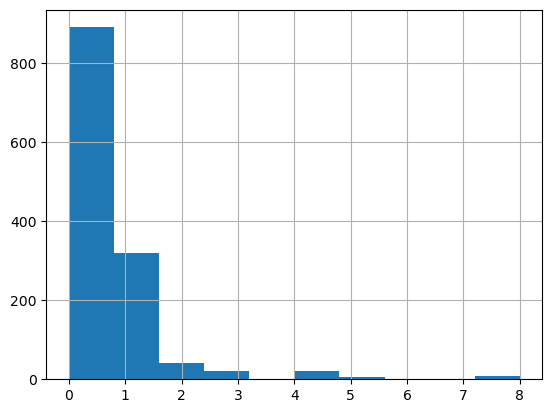

In [31]:
df['sibsp'].hist()

In [29]:
# Filtrar por un percentil
df[ df['sibsp'] >= df['sibsp'].quantile(0.95)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
42,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA"
79,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,2,NaN,"New York, NY"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,3,0,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
1209,3,0,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
1273,3,0,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
1274,3,0,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S,NaN,NaN,NaN


In [32]:
True and True

True

In [36]:
pd.Series([True, False]) & ~pd.Series([True, True])

0    False
1    False
dtype: bool

In [30]:
# Filtrar con & (and) y | (or)
df[(df['survived']==1) & (df['pclass']==3)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
603,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S,A,NaN,"East Providence, RI"
604,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA"
605,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S,A,NaN,"Perkins County, SD"
606,3,1,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S,15,NaN,"Taalintehdas, Finland Hoboken, NJ"
607,3,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,C,NaN,"Greensburg, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,15,NaN,NaN
1277,3,1,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,NaN,C,13 15,NaN,NaN
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN


In [40]:
df['name'].str.lower().str.contains('mrs')

0       False
1       False
2       False
3       False
4        True
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: name, Length: 1309, dtype: bool

In [41]:
# Filtrar por un substring
df[df['name'].str.lower().str.contains('allison')] # el .str hace referencia a que el valor es un string y el .lower() hace lowercase a todo el string.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Ordenar**

In [42]:
df.sort_values(['pclass','sibsp'], ascending=False, inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,NaN,67.0,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England"
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England"
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS"


In [46]:
df.loc[1304:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
600,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,NaN,NaN,NaN
601,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S,NaN,NaN,"East Providence, RI"
604,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England"
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England"
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS"



---


#### **Transformar Datos**


---


In [47]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [49]:
# Vemos que hay casos de 'age' con espacios (nulos escondidos)
df[df['age'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,0,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,NaN,NaN,"Streatham, Surrey"
283,1,0,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,NaN,NaN,"Gallipolis, Ohio / ? Paris / New York"
297,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C,D,NaN,"New York, NY"
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England"


**Transformo condicionalmente**

In [35]:
# Modifico age con espacios
df['age'] = np.where(df['age']=='',np.nan, df['age'])  # similar al if: np.where(condición, resultado true, resultado false)
df['age'].count() # chequeamos los nulos ahora

1046

In [36]:
# Armo el feature viaja_solo
df['viaja_solo'] = np.where((df['sibsp']>0) | (df['parch']>0),0,1)  # np.where(condicion/es,resultado si verdadero, resultado si falso)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,NaN,67.0,NaN,0
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England",1
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN,1
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England",1
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS",1


In [50]:
# Uso casos (como un if anidado): Armo rango_etario
conditions = [df['age']<13, df['age']<20, df['age']<60,df['age']<110]
choices = ["niño",'adolescente','adulto','anciano']

df['rango_etario'] = np.select(conditions, choices, default=np.nan)  # Si no lo encuentra es nan
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,rango_etario
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,nan
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,NaN,67.0,NaN,adolescente
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,nan
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,nan
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England",nan
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN,adulto
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England",nan
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS",anciano


In [40]:
# Cambiamos el nombre de la columna name a name_raw
df.rename(columns={'name':'name_raw'},inplace=True) # Se puede especificar más cambios dentro de las llaves

# Creamos una variable de Apellido y Nombre
df['last_name'] = df['name_raw'].apply(lambda x: x.split(',')[0])  # Tomo el campo nombre y divido por la ',', me quedo con la primera parte
df['name'] = df['name_raw'].apply(lambda x: x.split(',')[1]) # Tomo el campo nombre y divido por la ',', mequedo con la segunda parte y piso la columna 'name'
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario,last_name,name
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Master. Thomas Henry
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,NaN,67.0,NaN,0,adolescente,Sage,Master. William Henry
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Miss. Ada
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Miss. Constance Gladys
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,"Miss. Dorothy Edith ""Dolly"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England",1,nan,Williams-Lambert,Mr. Fletcher Fellows
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN,1,adulto,Wilson,Miss. Helen Alice
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England",1,nan,Woolner,Mr. Hugh
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS",1,anciano,Wright,Mr. George


In [41]:
# Separo la variable Titulo Familiar:
df['title'] = df['name'].apply(lambda x: x.split('.')[0]) # Creo el título
df['name'] = df['name'].apply(lambda x: x.split('.')[1])  # Piso el nombre
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario,last_name,name,title
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Thomas Henry,Master
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,NaN,67.0,NaN,0,adolescente,Sage,William Henry,Master
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Ada,Miss
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Constance Gladys,Miss
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England",1,nan,Williams-Lambert,Fletcher Fellows,Mr
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN,1,adulto,Wilson,Helen Alice,Miss
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England",1,nan,Woolner,Hugh,Mr
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS",1,anciano,Wright,George,Mr


In [42]:
# Cortamos un string: primeras 3 letras del apellido
df['mini_last_name'] = df['last_name'].apply(lambda x: str(x)[0:3])
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,viaja_solo,rango_etario,last_name,name,title,mini_last_name
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Thomas Henry,Master,Sag
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,NaN,67.0,NaN,0,adolescente,Sage,William Henry,Master,Sag
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Ada,Miss,Sag
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,Constance Gladys,Miss,Sag
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,NaN,NaN,"London, England",1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,3,NaN,NaN,1,adulto,Wilson,Helen Alice,Miss,Wil
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,D,NaN,"London, England",1,nan,Woolner,Hugh,Mr,Woo
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S,NaN,NaN,"Halifax, NS",1,anciano,Wright,George,Mr,Wri


**Opero con columnas**

In [43]:
# Operar con columnas: Sumo sibsp y	parch
df['n_familiares'] = df['sibsp'] + df['parch']
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,...,NaN,NaN,NaN,0,nan,Sage,Thomas Henry,Master,Sag,10
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,...,NaN,67.0,NaN,0,adolescente,Sage,William Henry,Master,Sag,10
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,...,NaN,NaN,NaN,0,nan,Sage,Ada,Miss,Sag,10
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,...,NaN,NaN,NaN,0,nan,Sage,Constance Gladys,Miss,Sag,10
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,...,NaN,NaN,NaN,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,...,NaN,NaN,"London, England",1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,...,3,NaN,NaN,1,adulto,Wilson,Helen Alice,Miss,Wil,0
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,...,D,NaN,"London, England",1,nan,Woolner,Hugh,Mr,Woo,0
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,...,NaN,NaN,"Halifax, NS",1,anciano,Wright,George,Mr,Wri,0


**Borro Columnas**

In [44]:
# Borro columnas
df.drop(['body','cabin','home.dest'], axis=1, inplace=True) # No hace falta poner el igual, ya que se aplica al mismo dataframe.
df

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Thomas Henry,Master,Sag,10
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,S,NaN,0,adolescente,Sage,William Henry,Master,Sag,10
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Ada,Miss,Sag,10
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Constance Gladys,Miss,Sag,10
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,S,NaN,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,S,D,1,nan,Woolner,Hugh,Mr,Woo,0
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,S,NaN,1,anciano,Wright,George,Mr,Wri,0


**Soluciono NAs**

In [45]:
# Quitar Na:
df_sin_na = df.dropna(how='any')  # El 'any' hace referencia a si tiene al menos una columna Na, la quita
                                  # Otra opción, es ponerle 'all' que saca la fila si tiene todo Na
print("Shape Original: ",df.shape, " Shape Nuevo: ", df_sin_na.shape)

Shape Original:  (1309, 18)  Shape Nuevo:  (415, 18)


In [46]:
# Imputar los Na con 0:
df_imputado = df.fillna(0) # También tiene el campo inplace
print("Shape Original: ",df.shape, " Shape Nuevo: ", df_imputado.shape)

Shape Original:  (1309, 18)  Shape Nuevo:  (1309, 18)



---


### **Agrupar el Dataset**


---

In [47]:
# Estadísticos por grupo (describe transpuesto)
grouped_pclass_describe = round(df.groupby('pclass').describe().T,2)
grouped_pclass_describe

pclass                   1       2       3
survived     count  323.00  277.00  709.00
             mean     0.62    0.43    0.26
             std      0.49    0.50    0.44
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      1.00    0.00    0.00
             75%      1.00    1.00    1.00
             max      1.00    1.00    1.00
age          count  284.00  261.00  501.00
             mean    39.16   29.51   24.82
             std     14.55   13.64   11.96
             min      0.92    0.67    0.17
             25%     28.00   22.00   18.00
             50%     39.00   29.00   24.00
             75%     50.00   36.00   32.00
             max     80.00   70.00   74.00
sibsp        count  323.00  277.00  709.00
             mean     0.44    0.39    0.57
             std      0.61    0.59    1.30
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      0.00    0.00    0.00
             75%      1.00    1.00    1.00
             max      3.00    3.00    8.00
parch        count  323.00  277.00  709.00
             mean     0.37    0.37    0.40
             std      0.72    0.69    0.98
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      0.00    0.00    0.00
             75%      0.50    1.00    0.00
             max      4.00    3.00    9.00
fare         count  323.00  277.00  708.00
             mean    87.51   21.18   13.30
             std     80.45   13.61   11.49
             min      0.00    0.00    0.00
             25%     30.70   13.00    7.75
             50%     60.00   15.05    8.05
             75%    107.66   26.00   15.25
             max    512.33   73.50   69.55
viaja_solo   count  323.00  277.00  709.00
             mean     0.50    0.57    0.67
             std      0.50    0.50    0.47
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      0.00    1.00    1.00
             75%      1.00    1.00    1.00
             max      1.00    1.00    1.00
n_familiares count  323.00  277.00  709.00
             mean     0.80    0.76    0.97
             std      1.06    1.03    1.92
             min      0.00    0.00    0.00
             25%      0.00    0.00    0.00
             50%      1.00    0.00    0.00
             75%      1.00    1.00    1.00
             max      5.00    5.00   10.00

In [48]:
# Agrupamos por clase
grouped_pclass = df.groupby('pclass') # No trae nada
print(type(grouped_pclass))  # Es un objeto!
grouped_pclass

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [49]:
# Imprimimos las tablas del grupo
for names, groups in grouped_pclass:
  print(names) # El valor de la variable agrupadora
  print(groups) # La tabla que comparte ese valor de la variable agrupadora

1
     pclass  survived                                       name_raw     sex  \
111       1         1                 Fortune, Miss. Alice Elizabeth  female   
112       1         1                     Fortune, Miss. Ethel Flora  female   
113       1         1                     Fortune, Miss. Mabel Helen  female   
114       1         0                 Fortune, Mr. Charles Alexander    male   
8         1         1  Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
..      ...       ...                                            ...     ...   
318       1         0         Williams-Lambert, Mr. Fletcher Fellows    male   
319       1         1                      Wilson, Miss. Helen Alice  female   
320       1         1                              Woolner, Mr. Hugh    male   
321       1         0                             Wright, Mr. George    male   
322       1         1                       Young, Miss. Marie Grice  female   

      age  sibsp  parch    ticket    

In [50]:
# Podemos armar un dataframe a partir de cada grupo!
dfs = {} # Armo el diccionario vacío
for name, group in grouped_pclass:
  dfs[f"pclass_{name}"] = group

In [51]:
# Traigo el dataframe con key pclass_1 dentro del diccionario dfs
dfs['pclass_1']

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S,10,0,adulto,Fortune,Alice Elizabeth,Miss,For,5
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,10,0,adulto,Fortune,Ethel Flora,Miss,For,5
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,10,0,adulto,Fortune,Mabel Helen,Miss,For,5
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,NaN,0,adolescente,Fortune,Charles Alexander,Mr,For,5
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,S,D,0,adulto,Appleton,Edward Dale (Charlotte Lamson),Mrs,App,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,S,NaN,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,S,D,1,nan,Woolner,Hugh,Mr,Woo,0
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,S,NaN,1,anciano,Wright,George,Mr,Wri,0


In [52]:
# También se puede usar el metodo específico
grouped_pclass.get_group(1)

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S,10,0,adulto,Fortune,Alice Elizabeth,Miss,For,5
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,S,10,0,adulto,Fortune,Ethel Flora,Miss,For,5
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S,10,0,adulto,Fortune,Mabel Helen,Miss,For,5
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S,NaN,0,adolescente,Fortune,Charles Alexander,Mr,For,5
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,S,D,0,adulto,Appleton,Edward Dale (Charlotte Lamson),Mrs,App,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,S,NaN,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0
319,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0
320,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,S,D,1,nan,Woolner,Hugh,Mr,Woo,0
321,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,S,NaN,1,anciano,Wright,George,Mr,Wri,0


**Funciones de Agregación**

Las funciones de agregación son aquellas que calculan una variable por grupo.

Métricas Básicas:

*   Suma: .sum()
*   Count: .count()
*   Count Distinct: .nunique()
*   Máximo: .max()
*   Mínimo: .min()
*   Media: .mean()
*   Mediana: .median()
*   Desviación Standar: .std()
*   Varianza: .var()

Acumuladas:

*   Contar acumulada: .cumcount()
*   Suma acumulada: .cumsum()
*   Máximo acumulativo: .cummax()
*   Mínimo acumulativo: .cummin()

Cambios dentro del grupo:

*   Cambios crecientes: .is_monotonic_increasing()
*   Cambios decreciente: .is_monotonic_decreasing()

Posición:

*   Primero del grupo: .first()
*   Último del grupo: .last()
*   Fila enésima del grupo: .nth()
*   Rango del valor en cada grupo en base a una métrica: .rank()

In [53]:
# Ej: Cantidad de campos únicos
grouped_pclass.nunique()

,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares
pclass,,,,,,,,,,,,,,,,,
1,2,323,2,65,4,5,188,107,3,21,2,5,229,316,16,178,6
2,2,277,2,65,4,4,192,48,3,12,2,5,199,257,7,170,6
3,2,707,2,79,7,8,549,133,3,18,2,5,480,603,5,346,9


**Agrupar por varias columnas**

In [54]:
grouped_segmentation = df[['sex','pclass','age',	'sibsp','parch']].groupby(['sex','pclass']).mean() # Usamos solo algunas columnas, agrupamos y hacemos el promedio
grouped_segmentation

age     sibsp     parch
sex    pclass                               
female 1       37.037594  0.555556  0.472222
       2       27.499191  0.500000  0.650943
       3       22.185307  0.791667  0.731481
male   1       41.029250  0.340782  0.279330
       2       30.815401  0.327485  0.192982
       3       25.962273  0.470588  0.255578

**Agrupamos usando distintas func de agregación**

In [55]:
grouped_segmentation_agg = df.groupby(['sex','rango_etario']).aggregate({'pclass': 'mean',
                                                                         'survived': 'mean',
                                                                         'fare': 'max',
                                                                         'name': 'count',
                                                                         'last_name': 'last'})
grouped_segmentation_agg

pclass  survived      fare  name last_name
sex    rango_etario                                              
female adolescente   2.305085  0.762712  262.3750    59   Taussig
       adulto        1.927007  0.770073  512.3292   274     Young
       anciano       1.272727  0.818182  263.0000    11     Stone
       nan           2.679487  0.602564  146.5208    78    Thorne
       niño          2.659091  0.613636  151.5500    44   Allison
male   adolescente   2.611111  0.097222  263.0000    72    Thayer
       adulto        2.266272  0.193294  512.3292   507  Williams
       anciano       1.586207  0.103448  263.0000    29    Wright
       nan           2.627027  0.140541  227.5250   185   Woolner
       niño          2.620000  0.540000  151.5500    50   Spedden

---


### **Joins de Dataframes**


---

In [56]:
# Hagamos mean_age_pclass (la media de la edad por clase) y joiniemosla con el df original
df_pclass_agg_age = df[['pclass','age']].groupby('pclass').mean().reset_index()
df_pclass_agg_age

,pclass,age
0,1,39.159918
1,2,29.506705
2,3,24.816367


In [57]:
# Joineo información agregada por pclass:

df_merge = pd.merge(df,df_pclass_agg_age, how = 'left',
                    left_on = ['pclass'], right_on = ['pclass'], suffixes = ['','_mean'])
                    # Nota: También se puede joinear por indice cambiando left_on a left_index = True y right_on a right_index = True

df_merge

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares,age_mean
0,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Thomas Henry,Master,Sag,10,24.816367
1,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,S,NaN,0,adolescente,Sage,William Henry,Master,Sag,10,24.816367
2,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Ada,Miss,Sag,10,24.816367
3,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Constance Gladys,Miss,Sag,10,24.816367
4,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10,24.816367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1,0,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,S,NaN,1,nan,Williams-Lambert,Fletcher Fellows,Mr,Wil,0,39.159918
1305,1,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,C,3,1,adulto,Wilson,Helen Alice,Miss,Wil,0,39.159918
1306,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,S,D,1,nan,Woolner,Hugh,Mr,Woo,0,39.159918
1307,1,0,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,S,NaN,1,anciano,Wright,George,Mr,Wri,0,39.159918


In [58]:
df_merge.head(50)

,pclass,survived,name_raw,sex,age,sibsp,parch,ticket,fare,embarked,boat,viaja_solo,rango_etario,last_name,name,title,mini_last_name,n_familiares,age_mean
0,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Thomas Henry,Master,Sag,10,24.816367
1,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,S,NaN,0,adolescente,Sage,William Henry,Master,Sag,10,24.816367
2,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Ada,Miss,Sag,10,24.816367
3,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Constance Gladys,Miss,Sag,10,24.816367
4,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,"Dorothy Edith ""Dolly""",Miss,Sag,10,24.816367
5,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Stella Anna,Miss,Sag,10,24.816367
6,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Douglas Bullen,Mr,Sag,10,24.816367
7,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,Frederick,Mr,Sag,10,24.816367
8,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,S,NaN,0,nan,Sage,George John Jr,Mr,Sag,10,24.816367
9,3,0,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,S,NaN,0,niño,Goodwin,Harold Victor,Master,Goo,7,24.816367


---


### **CrossTable**


---


Equivalente a las tablas Pivot ( o Dinámicas) de Excel.

In [59]:
# Ej con totales:

cross = pd.crosstab(df['rango_etario'],df['pclass'], values=df['survived'], aggfunc='mean',
                    margins = True, margins_name = 'Totales' )
cross

pclass,1,2,3,Totales
rango_etario,,,,
adolescente,0.809524,0.407407,0.289157,0.396947
adulto,0.646552,0.391089,0.230548,0.395647
anciano,0.384615,0.125000,0.166667,0.300000
nan,0.487179,0.250000,0.240385,0.277567
niño,0.800000,1.000000,0.400000,0.574468
Totales,0.619195,0.429603,0.255289,0.381971


**Visualización con Heatmap**

<Axes: xlabel='pclass', ylabel='rango_etario'>

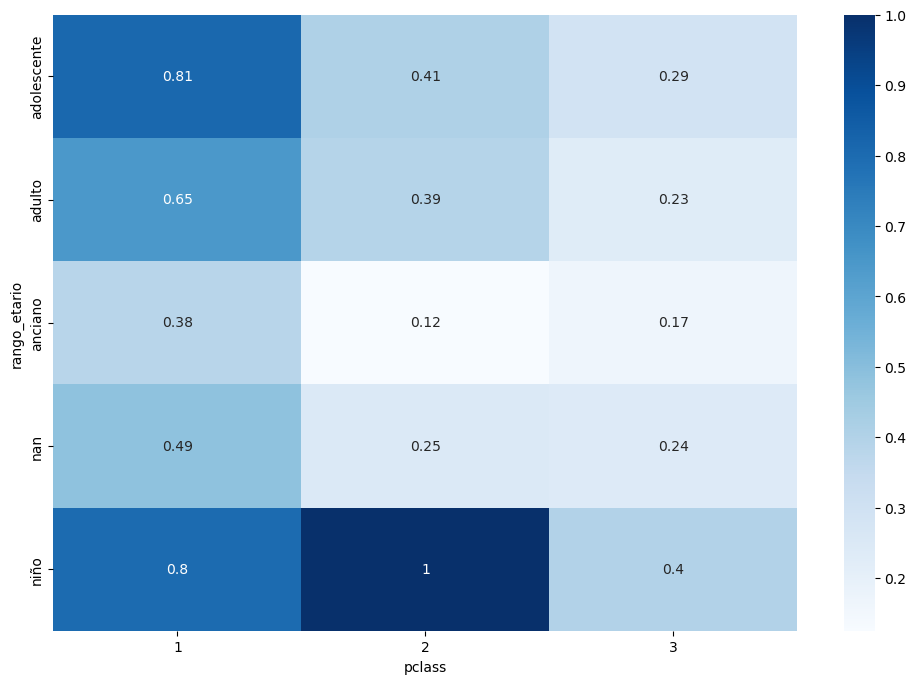

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

cross = pd.crosstab(df['rango_etario'],df['pclass'], values=df['survived'], aggfunc='mean')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cross, cmap= 'Blues', annot=True)

---


### **Guardamos el Dataframe**


---

**En un CSV**

In [61]:
df_merge.to_csv('../work/output.csv',index=False)

**En un Google Spreadsheet**

In [169]:
# Dirección del archivo
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/16AiilYU0DbGnEoQsvPuLtRjLpDaK4dMOmrgSAGnyyp4')

# Especifico Hoja del Spreadsheet
sheet = wb.worksheet('output')

# Elimino el contenido anterior
sheet.clear()

# Guardo el dataframe
set_with_dataframe(sheet, df_merge, include_index=False)

---


### **Ejercicios**


---

¿Cuál es el precio promedio que se pagó por un Ticket? (Fare)

In [6]:
df['fare'].mean()

33.29547928134557

¿Que le sucedió a la pasajera Mabel Skoog?

In [15]:
df[df['name'].str.contains('Skoog')][['name', 'survived', 'pclass']]

,name,survived,pclass
1206,"Skoog, Master. Harald",0,3
1207,"Skoog, Master. Karl Thorsten",0,3
1208,"Skoog, Miss. Mabel",0,3
1209,"Skoog, Miss. Margit Elizabeth",0,3
1210,"Skoog, Mr. Wilhelm",0,3
1211,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,3
